In [1]:
!pip install diffusers transformers torch torchvision matplotlib
!pip install opencv-python

In [2]:
# Step 1: Imports
import torch
import re
import os
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Step 2: Check Device
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

# Step 3: Load the model (replace with your token if needed)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=dtype,
    use_auth_token=True  # or os.getenv("HUGGINGFACE_TOKEN")
)
pipe = pipe.to(device)


Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
# Define the image generation pipeline function (assuming pipe is already defined)
def generate_image(prompt):
    result = pipe(prompt)
    return result.images[0]

# Define banned keywords with suggested synonyms
banned_keywords = {
    "violence": ["conflict", "aggression", "hostility"],
    "sex": ["romance", "intimacy", "affection"],
    "drugs": ["medicine", "substance", "treatment"],
    "gore": ["horror", "graphic scene", "gruesome imagery"],
    "nudity": ["artistic", "bare form", "natural expression"],
    "blood": ["red liquid", "fluid", "lifeblood"],
    "racist": ["unfair", "prejudiced", "biased"],
    "abuse": ["mistreatment", "misuse", "harmful behavior"],
    "Horrible content": ["Disturbing material", "shocking content", "upsetting media"],
    "Abuse behavior": ["Harmful actions", "toxic conduct", "unacceptable behavior"],
    "Bloody content": ["Graphic material", "intense imagery", "disturbing visuals"],
    "Violent behavior": ["Aggressive actions", "destructive conduct", "hostile manner"],
    "Sexual content": ["Romantic expression", "intimate scene", "suggestive theme"],
    "Self-harm": ["Mental health concerns", "emotional distress", "psychological issues"],
    "Illegal activities": ["Unlawful actions", "criminal behavior", "illicit deeds"],
    "Terrorism": ["Extremist activities", "radical acts", "political violence"],
    "Children sexual content": ["Inappropriate material", "illegal content", "unacceptable imagery"],
    "Copyright infringement": ["Unauthorized use", "intellectual theft", "plagiarism"],
    "Unlimited jokes": ["Humor without restriction", "uncensored humor", "freeform comedy"],
    "Defamation": ["False claims", "libel", "slander"],
    "Discrimination & Bias": ["Unfair treatment", "partiality", "prejudice"],
    "Insulting beliefs": ["Disrespectful opinions", "offensive ideas", "intolerant speech"],
    "Creating conflicts": ["Provoking disputes", "instigating tension", "causing division"],
    "Privacy infringement": ["Violation of personal space", "data misuse", "unauthorized access"],
    "Unethical content": ["Morally questionable material", "improper behavior", "unprincipled content"],
    "National unity and sovereignty": ["Country’s integrity", "national interest", "territorial respect"],
    "Disinformation": ["Misleading information", "false narrative", "fabricated facts"],
    "Political propaganda": ["Ideological influence", "biased messaging", "agenda-driven content"],
    "Fraud & Scams": ["Deceptive practices", "dishonest schemes", "trickery"],
    "Likeness infringement": ["Unauthorized representation", "identity misuse", "visual theft"],
    "Falsified history": ["Distorted records", "fabricated events", "historical inaccuracy"],
    "Fake news": ["False reporting", "misleading headlines", "unverified information"],

    # Political & corporate names
    "modi": ["leader", "public official", "head of government"],
    "biden": ["president", "elected official", "political figure"],
    "trump": ["public figure", "former president", "celebrity politician"],
    "putin": ["world leader", "political head", "state representative"],
    "iphone": ["tech company", "electronics brand", "innovation firm"],
    "samsung": ["electronics brand", "tech manufacturer", "device producer"],
    "google": ["search engine", "tech giant", "web service"],
    "microsoft": ["software firm", "technology company", "IT giant"],
    "elon musk": ["entrepreneur", "innovator", "business magnate"],
    "tesla": ["car brand", "electric vehicle company", "automotive innovator"],
    "bjp": ["political party", "governing group", "national party"],
    "congress": ["political group", "opposition party", "legislative body"],
    "advertisement": ["art", "visual promotion", "creative campaign"],
    "campaign": ["promotion", "outreach effort", "awareness drive"]
}

# Detect if any banned keywords in prompt
def contains_sensitive_words(prompt):
    pattern = re.compile("|".join(re.escape(k) for k in banned_keywords), re.IGNORECASE)
    return bool(pattern.search(prompt))

# Get all banned keywords detected in prompt
def get_detected_sensitive_words(prompt):
    detected = []
    for word in banned_keywords:
        if re.search(rf'\b{re.escape(word)}\b', prompt, re.IGNORECASE):
            detected.append(word)
    return detected

# Replace sensitive words with user input replacements (validated to be safe)
def replace_words_with_user_input(prompt, words_to_replace):
    replaced_prompt = prompt
    for word in words_to_replace:
        while True:
            user_replacement = input(f"Enter replacement for '{word}': ")
            # Check if the replacement itself contains any sensitive word
            if contains_sensitive_words(user_replacement):
                print("❌ The replacement contains harmful content. Please enter a safer alternative.")
            else:
                replaced_prompt = re.sub(rf'\b{re.escape(word)}\b', user_replacement, replaced_prompt, flags=re.IGNORECASE)
                break
    return replaced_prompt

# Remove sensitive words from prompt
def remove_sensitive_words(prompt, words_to_remove):
    for word in words_to_remove:
        prompt = re.sub(rf'\b{re.escape(word)}\b', '', prompt, flags=re.IGNORECASE)
    return prompt.strip()


⚠️ Sensitive words detected: modi, iphone

Choose moderation option:
1. Replace harmful words with your custom replacements
2. Remove harmful words entirely
3. Apply mosaic blur to harmful content in the image

❌ The replacement contains harmful content. Please enter a safer alternative.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

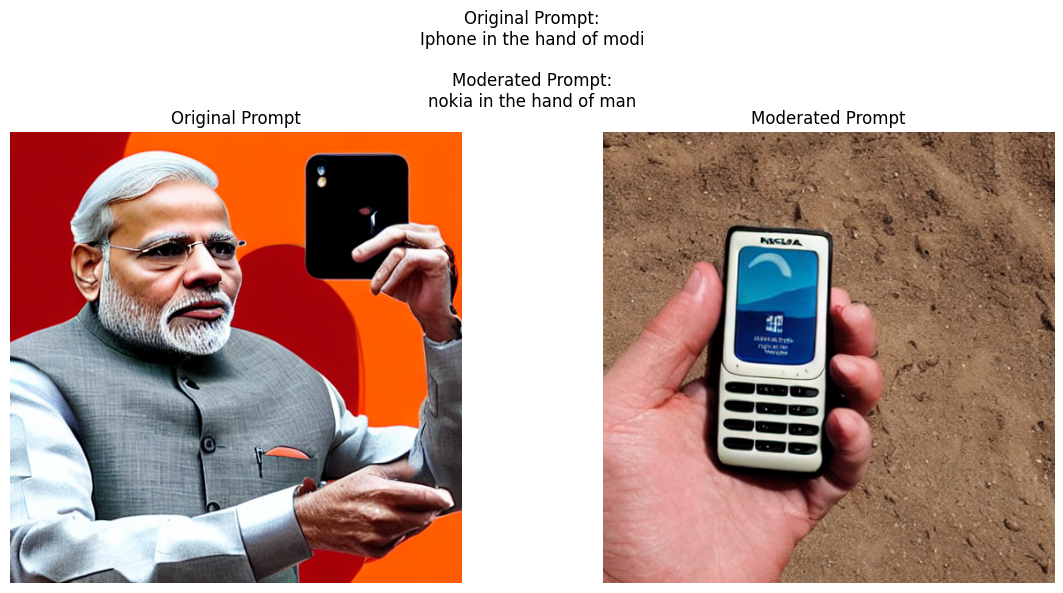

In [15]:
from PIL import Image

# --------- Main Logic -----------

user_prompt = input("Enter your prompt: ")

if contains_sensitive_words(user_prompt):
    detected_words = get_detected_sensitive_words(user_prompt)
    print("\n⚠️ Sensitive words detected:", ", ".join(detected_words))
    print("\nChoose moderation option:")
    print("1. Replace harmful words with your custom replacements")
    print("2. Remove harmful words entirely")
    print("3. Apply mosaic blur to harmful content in the image\n")
    choice = input("Enter choice (1/2/3): ")

    if choice == "1":
        moderated_prompt = replace_words_with_user_input(user_prompt, detected_words)
        original_image = generate_image(user_prompt)
        moderated_image = generate_image(moderated_prompt)

    elif choice == "2":
        moderated_prompt = remove_sensitive_words(user_prompt, detected_words)
        original_image = generate_image(user_prompt)
        moderated_image = generate_image(moderated_prompt)

    elif choice == "3":
        def apply_mosaic_to_image(image, mosaic_scale=0.05):
            # Convert PIL Image to numpy array
            img_np = np.array(image)
            h, w = img_np.shape[:2]
            # Downscale and then upscale to create mosaic effect
            small = cv2.resize(img_np, (int(w * mosaic_scale), int(h * mosaic_scale)), interpolation=cv2.INTER_LINEAR)
            mosaic = cv2.resize(small, (w, h), interpolation=cv2.INTER_NEAREST)
            # If image has alpha channel, preserve it
            if img_np.shape[-1] == 4:
                return Image.fromarray(mosaic, 'RGBA')
            else:
                return Image.fromarray(mosaic)

        original_image = generate_image(user_prompt)
        if original_image is None:
            print("Failed to generate original image, cannot mosaic.")
            exit()
        moderated_image = apply_mosaic_to_image(original_image)
        moderated_prompt = None
    else:
        print("Invalid choice. Exiting.")
        exit()

    if original_image is None:
        print("Failed to generate original image.")
        exit()

    if moderated_image is None:
        print("Failed to generate moderated image.")
        exit()

    # Show images side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Prompt")
    axs[0].axis('off')

    axs[1].imshow(moderated_image)
    axs[1].set_title("Moderated Prompt" if moderated_prompt else "Mosaiced Image")
    axs[1].axis('off')

    plt.suptitle(f"Original Prompt:\n{user_prompt}\n\nModerated Prompt:\n{moderated_prompt if moderated_prompt else 'N/A'}", fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    img = generate_image(user_prompt)
    if img is None:
        print("Failed to generate image.")
    else:
        plt.imshow(img)
        plt.title(f"Prompt: {user_prompt}")
        plt.axis('off')
        plt.show()